# Data Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
from shutil import copyfile
from PIL import Image

In [2]:
path = '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/UC_colonoscopy/'

Read the label file and build a dictionary: 

In [3]:
labels = pd.read_excel(path+'UC_Images_Labels/UC_deeplearning_imageLabels.xlsx')

In [20]:
labels.head()

,ID,basefile,pathname,file_seq,SubjectID,Time_sec,Video_time,Mayo_0,Mayo_1,Mayo_2,...,Findings_Waterjet,Findings_Diverticula,Location_Ileum,Location_Cecum,Location_Retroflexion,Comments,Poor_Image_UNCLASSIFIED,Quality_Good,Findings_Pills_retained,Location_appendicealOriface
0,119845,frame-000000.jpg,E:\Deep Learning - Endoscopy\001\frame-000000.jpg,1.0,001,1.0,00:00:01,False,False,False,...,False,False,False,False,False,NaN,True,False,False,False
1,119846,frame-000001.jpg,E:\Deep Learning - Endoscopy\001\frame-000001.jpg,2.0,001,2.0,00:00:02,False,False,False,...,False,False,False,False,False,NaN,True,False,False,False
2,119847,frame-000002.jpg,E:\Deep Learning - Endoscopy\001\frame-000002.jpg,3.0,001,3.0,00:00:03,False,False,False,...,False,False,False,False,False,NaN,True,False,False,False
3,119848,frame-000003.jpg,E:\Deep Learning - Endoscopy\001\frame-000003.jpg,4.0,001,4.0,00:00:04,False,False,False,...,False,False,False,False,False,NaN,True,False,False,False
4,119849,frame-000004.jpg,E:\Deep Learning - Endoscopy\001\frame-000004.jpg,5.0,001,5.0,00:00:05,False,False,False,...,False,False,False,False,False,NaN,True,False,False,False


In [7]:
labels.columns

Index(['ID', 'basefile', 'pathname', 'file_seq', 'SubjectID', 'Time_sec',
       'Video_time', 'Mayo_0', 'Mayo_1', 'Mayo_2', 'Mayo_3',
       'Poor_Image_underwater', 'Poor_Image_focus', 'Poor_Image_Stool',
       'Poor_Image_Bubbles', 'Post_Biopsy_Bleeding', 'Findings_BiopsyForceps',
       'Findings_Snare', 'Finding_Polyps', 'Finding_Pseudopolyps',
       'Findings_Waterjet', 'Findings_Diverticula', 'Location_Ileum',
       'Location_Cecum', 'Location_Retroflexion', 'Comments',
       'Poor_Image_UNCLASSIFIED', 'Quality_Good', 'Findings_Pills_retained',
       'Location_appendicealOriface'],
      dtype='object')

In [4]:
labels.Quality_Good.value_counts()

False    19102
True      7454
Name: Quality_Good, dtype: int64

In [4]:
labels_good = labels[(labels.Quality_Good == True) & (labels.Mayo_0 | labels.Mayo_1 | labels.Mayo_2 | labels.Mayo_3)]

In [5]:
n_good = len(labels_good)
filepath = labels_good.pathname.values

In [22]:
labels_good.pathname.values[0]

'E:\\Deep Learning - Endoscopy\\001\\frame-000243.jpg'

In [6]:
n_good

7433

In [7]:
mayo = np.empty(n_good, dtype='int')
mayo[labels_good.Mayo_0 == True] = 0
mayo[labels_good.Mayo_1 == True] = 1
mayo[labels_good.Mayo_2 == True] = 2
mayo[labels_good.Mayo_3 == True] = 3

In [8]:
pd.Series(mayo).value_counts()

0    5475
1    1092
2     585
3     281
dtype: int64

Add a new variable "Mayo" to represent the score:

In [9]:
labels_good = labels_good.assign(Mayo = mayo)

In [10]:
filepath[7000].split('\\')

['E:', 'Deep Learning - Endoscopy', 'Lycera_004', 'frame-001051.jpg']

In [10]:
labels_good.Mayo.value_counts()

0    5475
1    1092
2     585
3     281
Name: Mayo, dtype: int64

For some patients, there's not even good part of the intestine:

In [21]:
labels_good[(labels_good.SubjectID == '023')].Mayo.value_counts()

2    192
1    115
0     57
Name: Mayo, dtype: int64

Copy the files into corrsponding class folders, naming them as "folder name"+"file name" since the images from different colonoscopy could have the same file name.  

The following lines for copy run for a few minutes. 

In [12]:
for j in range(n_good):
    fplist = filepath[j].split('\\')
    mayo_class = str(mayo[j])
    copyfile(path+'UC_Images_Labels/'+fplist[2]+'/'+fplist[3], path+'categorized/'+mayo_class+'/'+fplist[2]+fplist[3])

Crop the images according to the different resolution and shape of the colonoscopies:

As shown below, the 1280$\times$720 images should be cropped to 900$\times$720, so they will have the same aspect ratio as 1280$\times$1024. 

In [14]:
img = Image.open(path+'UC_Images_Labels/001/frame-000001.jpg')

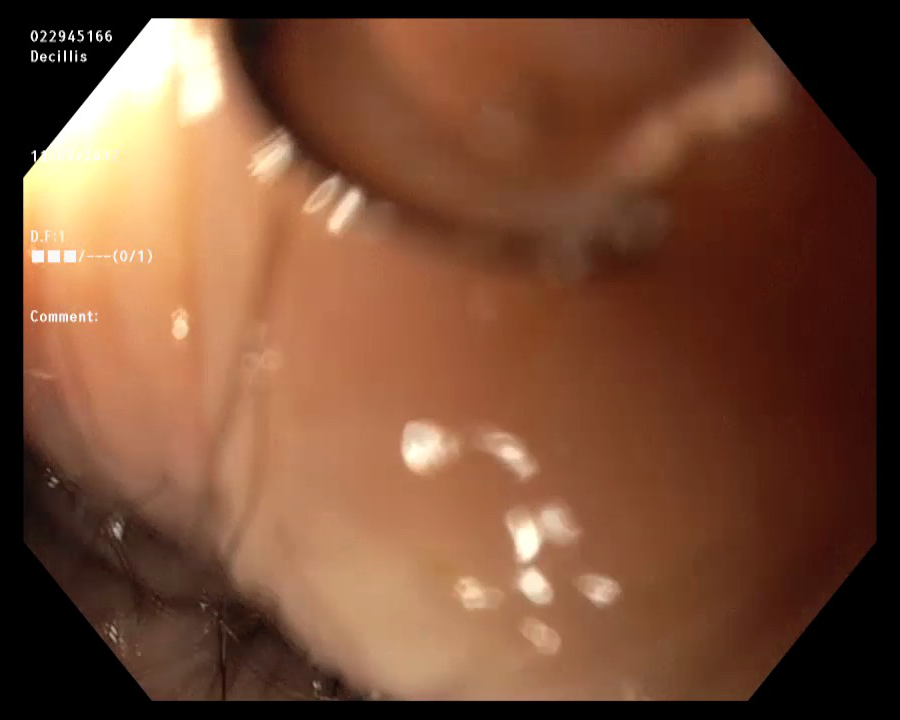

In [20]:
img.crop((190, 0, 1090, 720))

As shown below, the 1888$\times$1080 images should be cropped to 1350$\times$1080, so they will have the same aspect ratio as 1280$\times$1024. 

In [23]:
img = Image.open(path+'UC_Images_Labels/023/frame-000728.jpg')

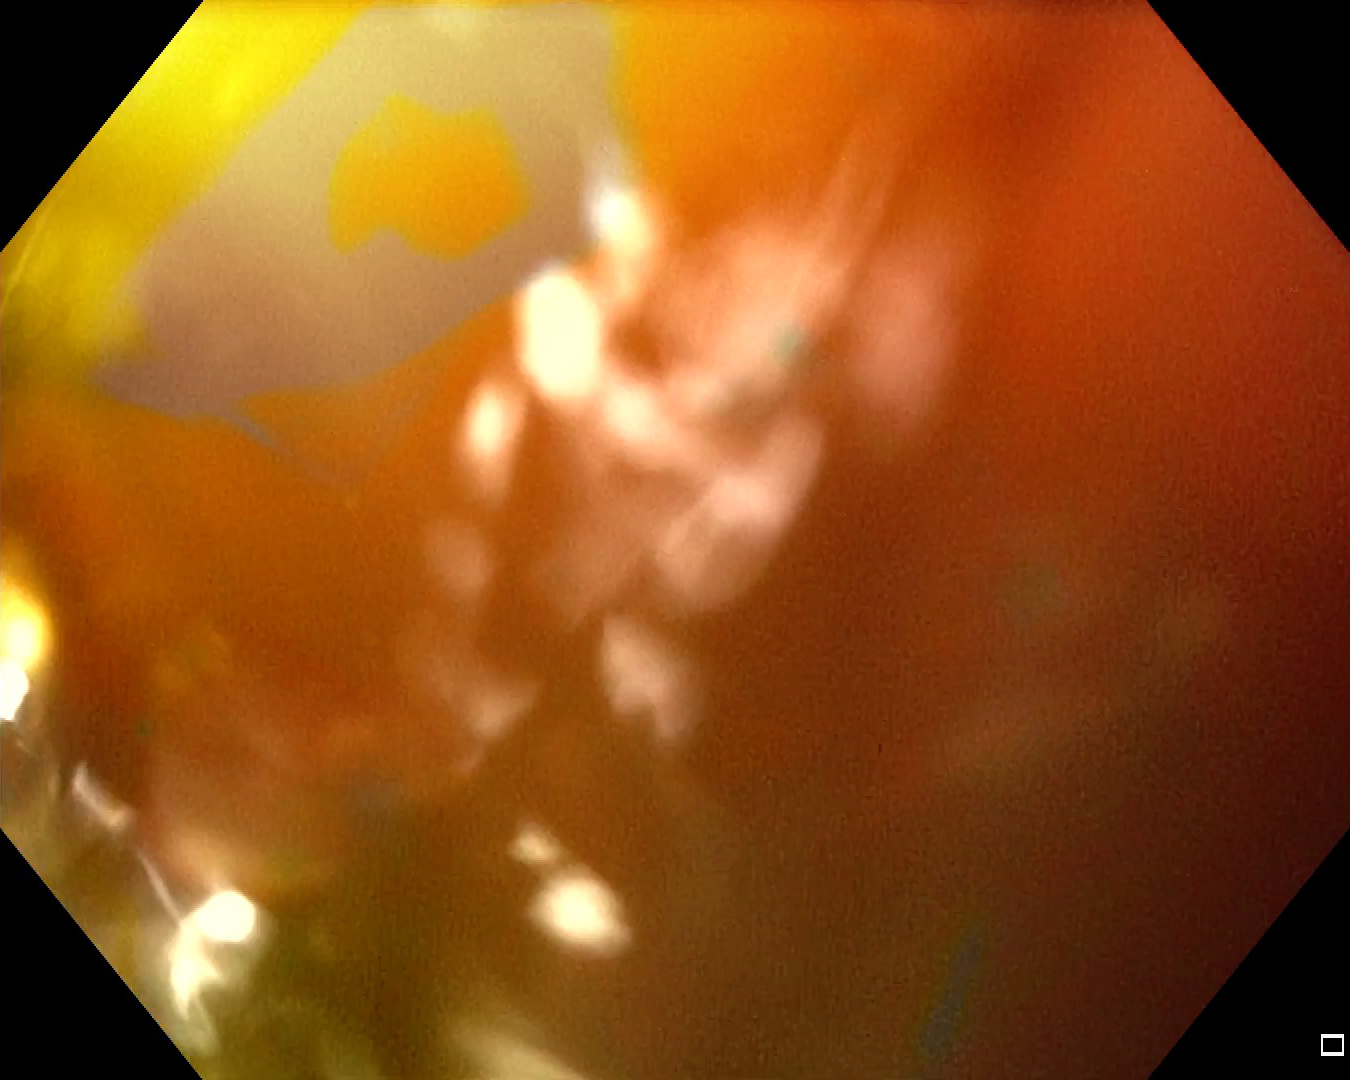

In [29]:
img.crop((538, 0, 1888, 1080))

As shown below, the 1920 ×× 1080 images should be cropped to 1350 ×× 1080, so they will have the same aspect ratio as 1280 ×× 1024.

In [30]:
img = Image.open(path+'UC_Images_Labels/Lycera_002/frame-000012.jpg')

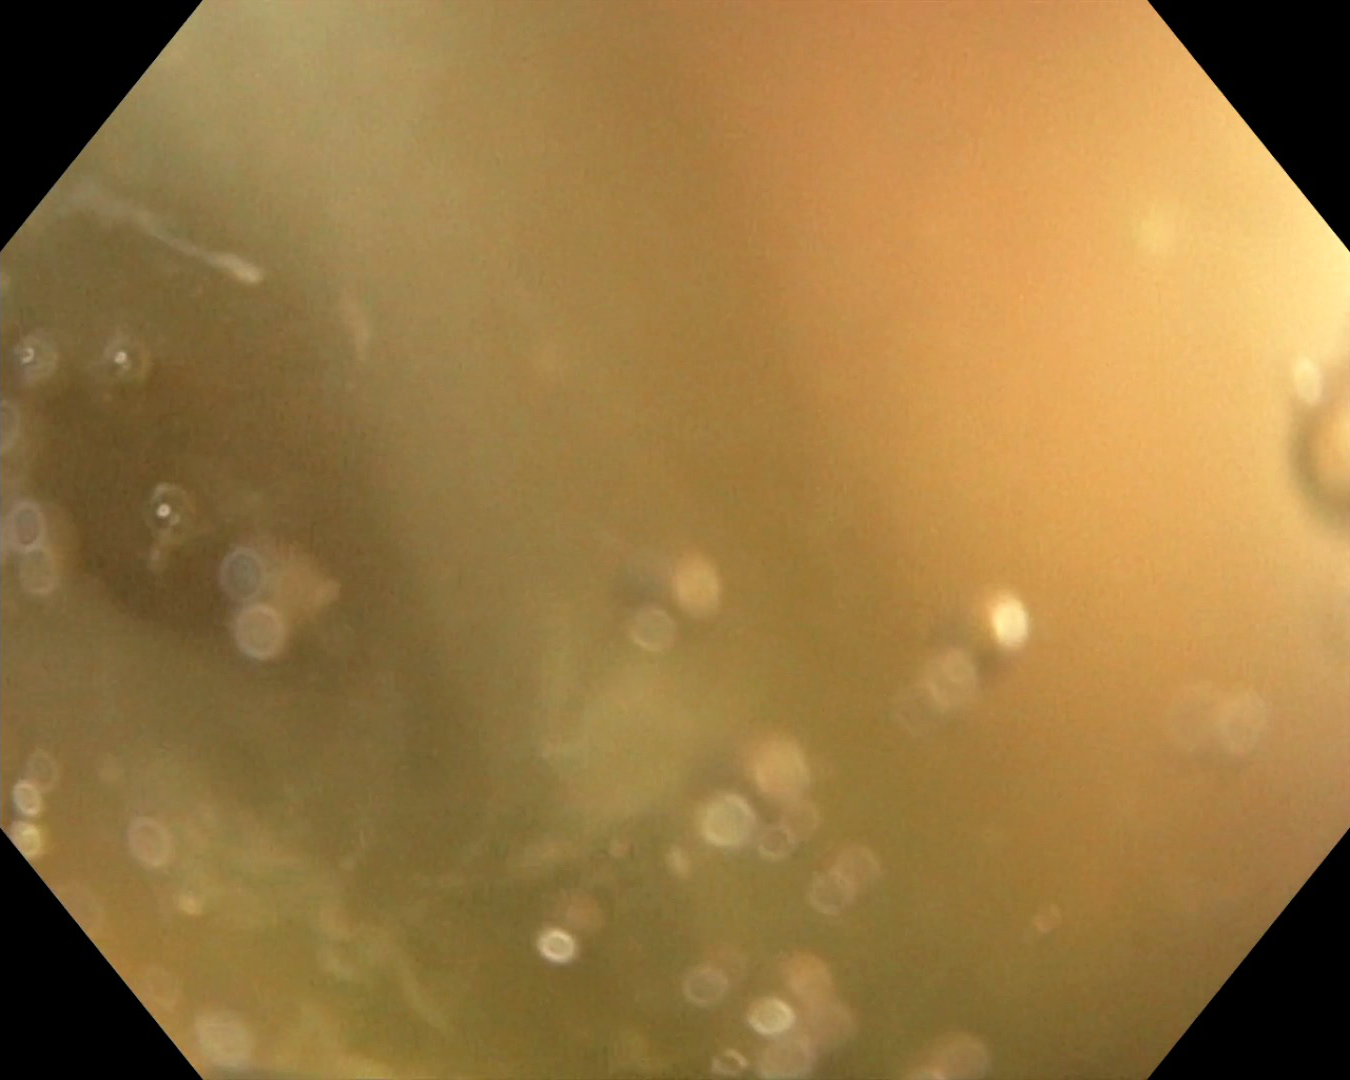

In [32]:
img.crop((285, 0, 1635, 1080))

The subject IDs that need crop 1280_720 to 900_720:

In [33]:
crop1_lst = ['001', '002', 'Lycera_001', 'Lycera_003', 'Lycera_004', 'Lycera_005']

The subject IDs that need crop 1888_1080 to 1350_1080:

In [35]:
crop2_lst = ['023']
crop3_lst = ['Lycera_002'] #1920*1080 to 1350*

In [42]:
subjectID = labels_good.SubjectID.values
for j in range(n_good):
    if subjectID[j] in crop1_lst:
        fplist = filepath[j].split('\\')
        mayo_class = str(mayo[j])
        img = Image.open(path+'categorized/'+mayo_class+'/'+fplist[2]+fplist[3])
        img = img.crop((190, 0, 1090, 720))
        img.save(path+'categorized/'+mayo_class+'/'+fplist[2]+fplist[3])
    elif subjectID[j] in crop2_lst:
        fplist = filepath[j].split('\\')
        mayo_class = str(mayo[j])
        img = Image.open(path+'categorized/'+mayo_class+'/'+fplist[2]+fplist[3])
        img = img.crop((538, 0, 1888, 1080))
        img.save(path+'categorized/'+mayo_class+'/'+fplist[2]+fplist[3])
    elif subjectID[j] in crop3_lst:
        fplist = filepath[j].split('\\')
        mayo_class = str(mayo[j])
        img = Image.open(path+'categorized/'+mayo_class+'/'+fplist[2]+fplist[3])
        img = img.crop((285, 0, 1635, 1080))
        img.save(path+'categorized/'+mayo_class+'/'+fplist[2]+fplist[3])

After the codes above, we copy all files in "categorized" to "splitted/train". 

In [56]:
dirName, subdirList, fileList = next(os.walk(path+'splitted/train/'))

subdirList

['2', '3', '0', '1']

Split the training and validation sets by randomly move 20% of the images to the corresponding class folders in the validate folder:

In [58]:
np.random.seed(8)
for folder in subdirList:
    for dirname, subdirlist, filelist in os.walk(dirName+folder):
        for f in filelist:
            if np.random.rand()<0.2:
                os.rename(os.path.join(dirname, f), path+'splitted/validation/'+folder+'/'+f)            